Data Analysis Plan
---
Goal: Test multiple models on the relationship between IGT scores & ventral striatal sensitivity between DRD2 carrier groups

- Grab variables of interest
    - P = D.P_payoff
    - Q = D.Q_sensitivity 
    - VS = D.Cards_RNR_VS_mean 
    - AGE = D.AGE
    - SEX = D.female_1
    <br><br>
- Filter to only get subjects who have data for P and VS, and who are white <br><br>
    good=find(~isnan(VS) & ~isnan(P) & D.white(1)<br>
    good_subs = zeros(size(AGE))<br>
    good_subs(good) = 1<br>
    N = length(D.AGE(good))<br>
    <br>
- Separate by DRD2 polymorphism<br><br>
    1 = Del. carrier (low D2) <br>
    0 = Ins/Ins (normal D2) <br>
    drd2_high = find(good_subs & D.DRD2_score==1) <br>
    drd2_low = find(good_subs & D.DRD2_score==0) <br>
    <br>
---

Analysis pipeline:

1. Demographic summary of groups:
    - Age
    - Sex
    - N (number in each group)
<br><br>
2. Group (DRD2 group) differences in:
    - VS
    - P
    - Q
    
         a.) visualize in graph <br>
         b.) analyze with t-test
<br><br>
3. Separate P vs. VS regressions for each group
    - Control for: Age & sex?


Dependencies

In [26]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sb
from scipy import stats

pd.set_option('display.max_columns', 8)

Demographic summary

In [11]:
data = pd.read_csv('DRD2_subset_data.csv', delimiter=',')
data = data.dropna(subset=['P','Q','VS','DRD2'])

Age

AGE Summary: count    438.000000
mean      42.666667
std        7.370442
min       30.000000
25%       36.000000
50%       43.500000
75%       49.000000
max       54.000000
Name: AGE, dtype: float64


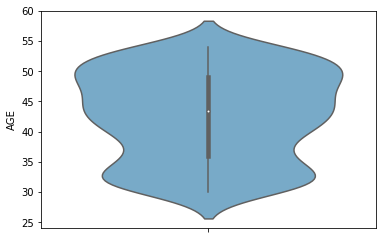

In [18]:
age_summary = data.AGE.describe()
print('AGE Summary:', age_summary)
AGE_violin = sb.violinplot(y='AGE', data=data, palette='Blues')


Sex

Sex Summary: count    438.000000
mean       0.520548
std        0.500149
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: female_1, dtype: float64


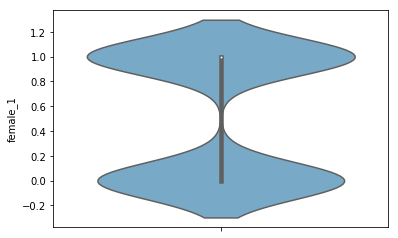

In [19]:
sex_summary = data.female_1.describe()
print('Sex Summary:', sex_summary)
SEX_violin = sb.violinplot(y='female_1', data=data, palette='Blues')

IGT Measures Summary 

 P 
 count    438.000000
mean      16.369863
std       29.908177
min      -92.000000
25%       -4.000000
50%       14.000000
75%       40.000000
max       96.000000
Name: P, dtype: float64 

 Q 
 count    438.000000
mean      31.616438
std       25.414800
min      -46.000000
25%       16.000000
50%       38.000000
75%       48.000000
max       86.000000
Name: Q, dtype: float64


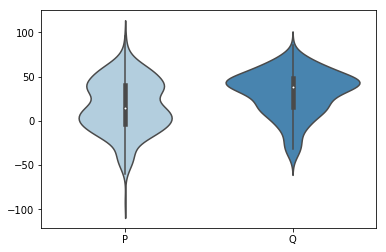

In [24]:
P_summary = data.P.describe()
Q_summary = data.Q.describe()
print('IGT Measures Summary','\n\n','P','\n', P_summary, '\n\n','Q','\n', Q_summary)
IGT_violin = sb.violinplot(data=data.iloc[:,2:4], palette='Blues')

VS Summary count    438.000000
mean       0.107567
std        0.166886
min       -0.543820
25%        0.008345
50%        0.099525
75%        0.204464
max        0.851100
Name: VS, dtype: float64
Obesity Summary count    432.000000
mean      -0.004776
std        1.004456
min       -2.264433
25%       -0.785395
50%       -0.094756
75%        0.667557
max        2.721058
Name: Obesity, dtype: float64


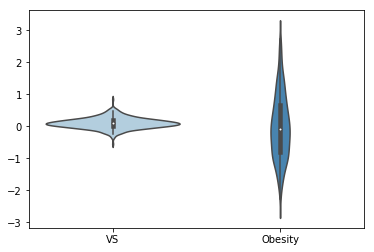

In [25]:
VS_summary = data.VS.describe()
Ob_summary = data.Obesity.describe()
print('VS Summary', VS_summary)
print('Obesity Summary', Ob_summary)
VS_Ob_violin = sb.violinplot(data=data.iloc[:,4:6], palette='Blues')

If DRD2 == 1, subjects are DRD2 deletion carriers --> low D2 receptors --> High DA

If DRD2 == 0, subjects are DRD2 insertion carriers --> normal D2 receptors --> Low DA

In [ ]:
scipy.stats.ttest_ind()